# Biodiversity in National Parks

In this project, we will be examine data gathered from US National Parks. The goal is to find which parks contain the most diversity within.

We will answer the following questions:

* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?

The Data source was given to me from Codecademy for completion of the data analysis course. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

I have imported the required CSVs for the project then we will start to examine them in the next section.

In [2]:
species_data = pd.read_csv("species_info.csv")
observation_data = pd.read_csv("observations.csv")

## Examine Species Data

In this section, I have added lines to explore the data and to know what is contained in the Species Data.

In [3]:
print("Species")
print("Info")
print(species_data.shape)
print("Value Count")
print(species_data.value_counts(subset="scientific_name"))
print("Describe")
print(species_data.describe())
print(species_data.groupby("category").size())
#print(species_data.head())

Species
Info
(5824, 4)
Value Count
scientific_name
Canis lupus                            3
Holcus lanatus                         3
Puma concolor                          3
Myotis lucifugus                       3
Castor canadensis                      3
                                      ..
Equisetum laevigatum                   1
Equisetum hyemale ssp. affine          1
Equisetum fluviatile                   1
Epipactis gigantea                     1
Zygodon viridissimus var. rupestris    1
Length: 5541, dtype: int64
Describe
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                

## Examine Species Data

In this section, I have added lines to explore the data and to know what is contained in the Observation Data.

In [4]:
print("Observation")
print(observation_data.shape)
print(observation_data.describe())
#print(observation_data.head(15))


Observation
(23296, 3)
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


## Clean Data Values

Out of 25632 entries, only 880 of the `conservation_status` entires do not contain a NULL value. The next step will change these NULL values into a `Not Threatened` value.

In [5]:
species_data = species_data.fillna(value={'conservation_status': 'Not Threatened'})
#print(species_data.head())

## Plot Bar Graph of animals

In [10]:
conservation_status_count = species_data[species_data.conservation_status != "Not Threatened"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
print(conservation_status_count)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


<AxesSubplot:xlabel='conservation_status'>

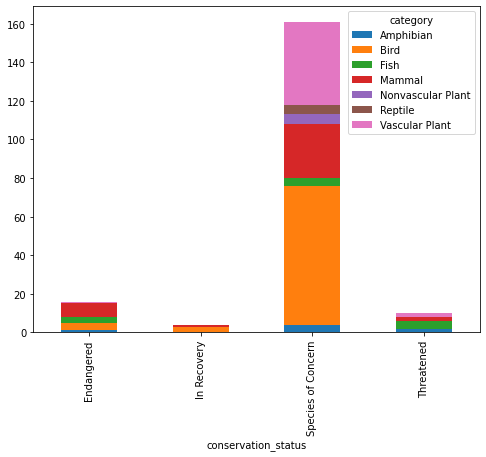

In [13]:
conservation_status_count.plot(kind='bar', figsize=(8,6), stacked=True)